In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import wordcloud

# Set a clean and minimalist style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

# Choose a soft, muted color palette
sns.set_palette('muted')

In [12]:
all_files = [f"fetched_data/track_data_{i}" for i in range(0, 194200, 50)]
df_list = [pd.read_csv(file) for file in all_files]
df = pd.concat(df_list, ignore_index=True)

In [14]:
df.columns

Index(['artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'href', 'id', 'is_local', 'name', 'popularity',
       'preview_url', 'track_number', 'type', 'uri', 'album.album_type',
       'album.artists', 'album.available_markets',
       'album.external_urls.spotify', 'album.href', 'album.id', 'album.images',
       'album.name', 'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri', 'external_ids.isrc',
       'external_urls.spotify'],
      dtype='object')

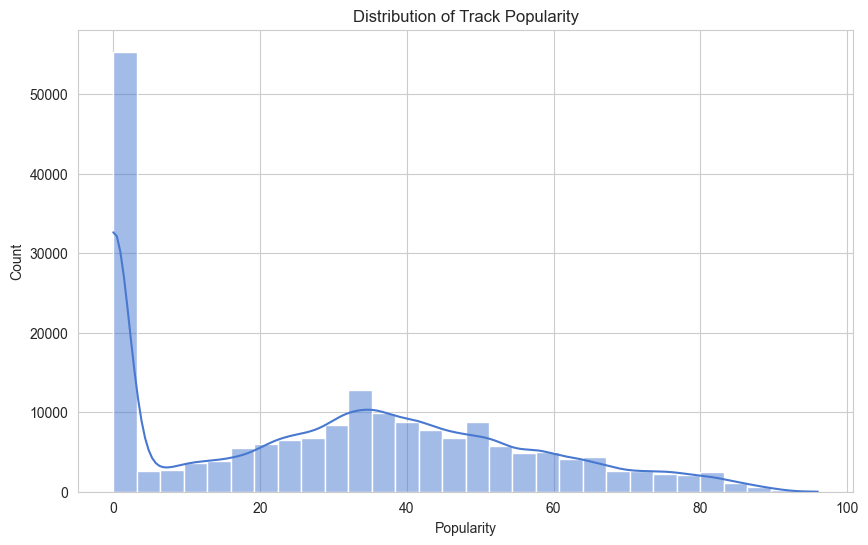

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

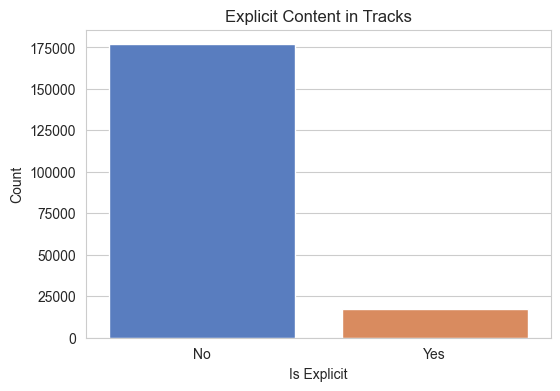

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='explicit', data=df)
plt.title('Explicit Content in Tracks')
plt.xlabel('Is Explicit')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

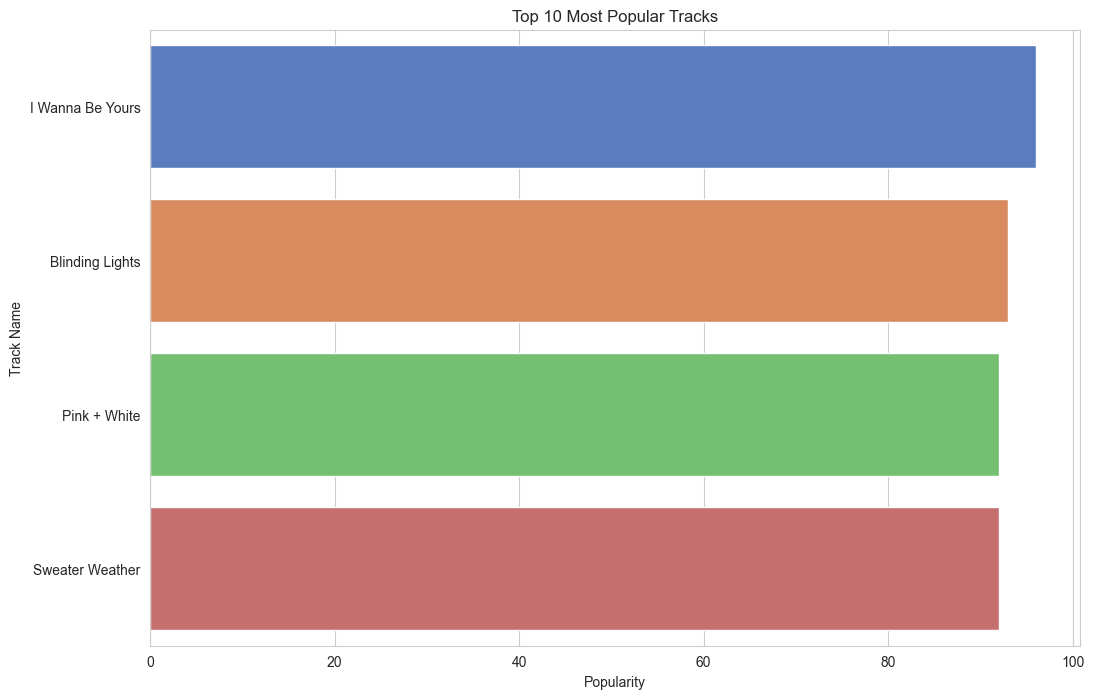

In [18]:
top_tracks = df.nlargest(10, 'popularity')
plt.figure(figsize=(12, 8))
sns.barplot(x='popularity', y='name', data=top_tracks)
plt.title('Top 10 Most Popular Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.show()

In [22]:
import pandas as pd
import ast  # To safely evaluate strings containing Python literals

# Assuming `df` is your DataFrame and 'artists' column contains string representations of lists
df['artists'] = df['artists'].apply(ast.literal_eval)  # Convert stringified lists to actual lists

# Extract artist pairs from each track
collaborations = []

for index, row in df.iterrows():
    artists = row['artists']
    track_id = row['id']
    for i in range(len(artists)):
        for j in range(i + 1, len(artists)):
            collaborations.append((artists[i]['name'], artists[j]['name'], track_id))

# Create a DataFrame for collaborations
collab_df = pd.DataFrame(collaborations, columns=['Artist1', 'Artist2', 'TrackID'])

In [24]:
collab_df

,Artist1,Artist2,TrackID
0,Shawn Mendes,Camila Cabello,7crplFzt7spG80NCbpmuCp
1,Yellow Claw,Mustard,1xQv4unOladJFtLUOy2eb7
2,Yellow Claw,Ty Dolla $ign,1xQv4unOladJFtLUOy2eb7
3,Yellow Claw,Tyga,1xQv4unOladJFtLUOy2eb7
4,Mustard,Ty Dolla $ign,1xQv4unOladJFtLUOy2eb7
...,...,...,...
90099,Moderator,Josh Garrels,1AW4amyytwC0JNVmpVngIN
90100,Moderator,Drips Zacheer,57MOIpaL6Bo7dTYMTAUaHT
90101,Moderator,Thomas Prime,6qo8HnjJda3Qmq7Rz9grjD
90102,Moderator,Drips Zacheer,451Ilr5PyMWjNbhos9OEE1
